No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[131.63333333 131.6        124.96666667 119.7        114.5
 109.63333333 105.         101.          97.          93.9
  90.          86.66666667  86.7         86.66666667  83.13333333
  80.53333333  77.7         75.          72.56666667  71.93333333
  70.          67.06666667  65.          63.          62.96666667
  60.9         60.9         59.        ]


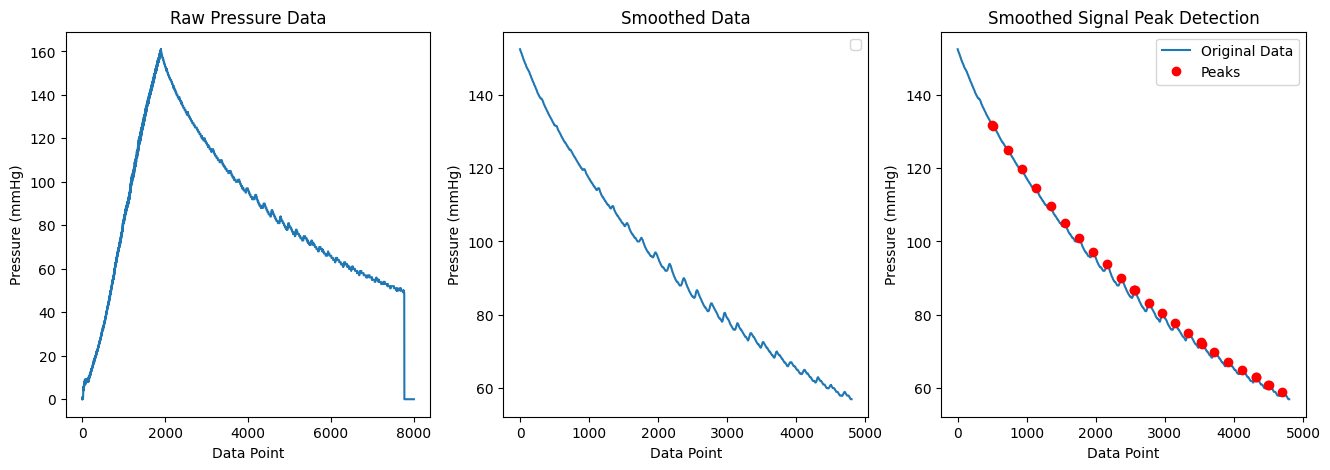

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import butter, filtfilt, hilbert

values = np.array([0,0,0,0,0,0,1,1,2,2,1,1,1,1,1,2,4,5,5,5,5,5,4,5,5,5,5,5,5,5,4,5,5,4,5,4,5,5,4,5,5,4,6,4,6,5,4,6,5,6,5,5,6,5,6,5,5,6,5,6,5,5,6,5,6,5,6,5,5,6,5,7,5,6,5,5,6,5,7,5,6,5,5,6,5,7,5,6,5,5,6,5,7,5,7,5,6,6,5,6,5,7,5,7,5,6,6,5,6,5,7,5,7,5,6,6,5,7,5,7,5,7,5,6,6,5,6,5,7,4,7,5,6,5,5,6,5,7,4,7,4,7,5,6,5,6,5,5,6,4,6,4,7,4,6,5,6,5,5,6,5,6,4,7,4,7,4,6,5,6,5,6,5,5,6,5,6,4,7,4,7,4,7,5,6,5,6,5,5,6,5,6,5,7,4,7,4,7,4,7,5,7,5,7,5,6,6,6,6,6,7,5,7,5,7,5,7,5,8,5,8,5,8,5,8,6,7,6,7,6,7,7,7,7,6,7,6,7,6,8,6,8,6,8,6,8,6,8,6,8,6,9,6,9,6,9,6,9,6,8,7,8,7,8,7,8,8,8,8,8,8,8,8,8,8,8,9,8,9,7,9,7,9,7,9,7,10,7,10,7,10,7,10,7,10,7,10,7,10,7,10,8,10,8,10,8,11,8,11,8,11,8,11,8,11,8,11,8,11,8,11,8,11,8,11,8,11,8,11,8,11,9,11,9,12,9,12,9,12,9,12,9,12,9,12,10,12,10,12,10,12,10,12,10,12,10,12,11,11,11,12,11,12,12,11,12,11,12,11,12,11,12,11,13,11,13,11,13,11,14,11,14,11,14,11,14,11,14,11,14,12,14,12,14,13,13,14,13,14,13,15,12,16,12,16,13,16,15,14,16,13,17,14,17,15,15,18,14,18,15,15,19,14,18,17,14,19,15,16,19,15,18,19,15,18,19,15,18,20,15,18,20,16,17,21,17,17,21,18,16,21,19,16,20,20,17,18,22,18,17,21,19,17,21,21,17,20,22,18,18,22,19,17,22,21,17,21,22,18,19,23,19,18,23,21,18,22,23,18,20,23,19,19,23,21,18,23,22,19,22,24,19,20,24,20,20,24,22,19,24,23,19,23,24,20,22,24,20,21,25,22,20,25,23,20,24,24,20,23,25,20,23,25,21,21,26,22,21,26,23,21,25,24,21,26,25,21,25,26,21,24,26,22,24,26,22,22,27,23,22,27,24,22,27,25,22,27,25,22,26,26,22,26,27,22,26,27,23,25,28,23,25,28,23,25,28,24,25,29,24,25,28,24,25,29,24,25,29,25,25,29,25,25,29,25,25,30,25,25,29,25,25,30,26,25,30,26,25,30,25,26,30,26,26,30,26,26,30,25,27,30,26,28,31,26,28,30,25,29,30,26,29,30,25,30,30,25,31,29,26,31,29,26,31,29,26,32,29,27,32,28,27,32,28,28,32,27,29,32,27,30,32,27,30,32,27,31,31,27,32,31,28,33,30,28,33,29,29,34,28,30,33,28,32,32,28,33,32,28,33,31,28,34,30,30,34,29,32,33,29,33,33,29,34,32,29,35,30,31,35,30,33,34,29,34,33,30,35,32,30,36,31,32,35,30,34,34,30,35,33,31,36,32,32,36,31,34,36,30,36,34,31,36,33,32,37,32,34,37,31,36,36,31,37,34,32,37,33,35,37,32,36,36,32,38,35,33,38,33,35,38,32,38,37,33,38,35,34,39,34,36,39,33,38,37,33,40,35,35,39,34,38,39,34,39,37,35,40,36,37,40,35,39,39,34,41,37,37,41,35,39,40,35,41,38,37,41,36,38,41,36,41,39,36,42,37,39,42,36,41,40,37,42,39,39,43,37,41,42,37,43,40,38,44,38,41,43,37,43,41,38,44,39,41,44,38,43,42,39,44,40,41,45,39,44,43,39,46,41,42,45,39,45,43,40,46,41,43,46,40,46,43,41,47,42,44,46,41,47,44,42,48,42,46,46,41,48,43,44,47,41,47,45,43,48,43,46,47,42,48,45,45,49,43,48,47,43,50,44,47,49,43,49,46,45,50,44,49,48,44,51,45,48,50,44,51,46,47,51,45,51,48,46,52,45,50,50,46,52,47,50,51,46,52,48,49,52,46,52,49,49,53,47,52,50,48,54,48,52,52,48,54,48,52,52,49,55,49,53,53,49,55,50,53,53,49,56,50,53,54,50,56,50,54,54,50,56,50,55,54,51,57,50,56,54,52,57,51,57,53,53,57,51,57,53,55,57,51,58,53,56,57,52,59,52,58,56,54,59,52,59,55,55,59,53,60,55,57,59,54,61,54,59,58,56,61,54,61,57,58,61,55,62,56,60,59,57,62,55,62,57,60,61,56,63,56,63,59,59,63,56,64,57,62,61,59,64,57,64,59,62,62,59,65,58,65,59,63,63,60,65,58,66,60,63,64,60,67,59,66,61,64,64,61,67,60,67,61,66,64,63,67,60,68,61,67,63,64,67,62,68,61,68,63,67,66,64,69,62,70,62,69,65,66,67,64,70,62,70,63,70,65,67,69,65,71,63,71,64,70,67,68,70,65,72,64,72,65,71,68,68,71,66,72,65,73,65,72,68,70,71,68,73,66,74,66,73,68,72,70,69,73,68,75,66,75,68,73,70,72,73,70,76,68,77,68,76,70,74,73,73,76,71,77,69,78,70,77,72,75,74,74,76,72,78,71,79,70,79,72,77,74,76,76,74,78,73,80,71,80,72,79,73,79,75,77,77,75,80,74,81,73,81,73,82,74,80,76,79,78,77,80,76,82,75,83,74,83,75,82,76,82,78,80,80,78,82,77,84,76,84,75,85,76,84,78,83,79,82,81,80,83,79,85,78,86,77,86,77,86,78,85,80,84,81,83,83,81,85,80,87,79,87,78,88,78,88,79,87,80,86,82,85,83,84,85,83,87,82,88,81,89,80,90,80,89,80,89,81,89,82,88,83,87,84,86,86,85,88,84,89,84,90,83,91,82,92,82,92,82,92,82,93,84,92,85,92,86,92,87,91,89,90,90,90,91,89,92,89,93,88,94,88,95,87,96,87,96,87,96,87,97,87,97,87,97,87,97,87,97,87,97,87,97,88,97,88,97,88,97,89,97,90,96,90,97,91,96,92,96,91,97,92,96,93,96,93,97,93,96,94,96,94,97,94,97,94,97,93,98,93,98,94,98,93,99,93,99,93,100,92,101,93,101,92,101,92,102,92,102,93,102,93,103,93,103,94,103,94,103,95,102,95,102,96,100,97,100,98,99,98,98,100,98,101,97,101,96,103,95,104,95,104,95,105,95,105,96,105,97,105,97,104,98,103,99,102,101,101,102,100,103,98,105,98,105,97,106,97,108,97,107,98,108,99,108,100,107,101,106,103,105,105,104,107,103,108,101,110,101,111,101,112,102,112,103,111,104,110,105,107,108,106,109,104,111,103,113,103,113,104,113,105,111,106,109,108,107,110,104,113,104,113,104,114,105,113,105,111,107,109,109,106,112,105,114,105,115,105,115,106,113,108,111,110,107,113,106,114,106,116,106,116,107,114,109,112,110,109,114,107,115,107,117,107,117,108,115,110,112,112,109,115,108,117,108,118,109,118,109,115,111,113,113,110,117,109,118,109,119,110,118,111,116,113,113,116,110,119,110,120,110,121,111,118,113,116,115,113,118,111,121,111,122,112,121,113,119,115,116,118,114,120,112,123,112,123,114,121,115,118,118,115,121,113,123,114,125,115,123,117,120,120,116,124,116,126,116,127,118,123,120,120,123,117,126,117,128,118,125,120,122,122,118,127,118,128,118,126,120,121,124,119,127,118,129,119,126,121,122,124,119,128,119,129,119,125,122,121,126,120,130,119,128,121,125,124,120,129,120,130,121,128,122,123,127,121,130,121,131,122,126,125,122,129,122,132,122,128,124,124,128,122,132,122,130,124,126,128,123,132,123,132,124,128,127,124,132,124,133,124,129,127,125,132,124,134,124,130,127,126,132,125,135,125,131,128,127,133,126,136,126,131,129,127,134,126,136,126,131,130,127,135,127,135,127,131,132,128,137,127,134,129,130,134,128,138,128,133,132,129,137,128,138,129,131,135,129,139,129,136,131,131,139,130,139,131,135,135,132,141,131,138,134,132,139,132,140,132,134,138,132,142,132,136,137,133,141,132,139,134,133,142,132,140,133,135,139,133,141,133,136,138,133,142,133,136,139,134,143,134,139,137,135,144,134,139,137,135,144,135,139,138,136,144,135,141,137,136,145,135,141,137,136,144,136,141,139,137,145,136,143,138,138,146,136,142,138,138,146,137,142,140,138,146,137,143,140,139,148,137,143,141,139,147,138,141,143,139,148,138,142,143,140,148,139,142,144,140,149,139,140,146,140,148,140,142,146,141,147,141,141,148,141,148,141,142,150,141,147,142,142,150,141,145,144,142,151,141,146,144,143,151,141,145,146,143,151,142,144,149,143,151,142,145,149,144,150,143,144,150,144,151,144,145,153,144,151,145,145,153,145,150,148,146,154,145,151,147,147,155,145,149,150,146,155,145,147,152,146,154,146,148,153,147,153,147,147,155,147,153,148,148,157,146,151,150,148,157,147,149,154,148,156,147,150,154,149,154,149,149,157,148,155,149,150,159,148,154,152,150,159,149,151,155,150,159,149,152,155,151,157,150,151,158,150,157,151,151,160,150,156,153,152,160,151,154,156,152,154,153,153,153,152,153,153,153,153,153,152,152,152,152,152,152,152,152,152,152,151,151,151,151,151,151,151,151,151,151,151,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,149,149,149,149,149,149,149,149,149,149,149,149,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,147,147,147,147,147,147,147,147,147,147,147,146,146,146,146,146,146,146,146,146,146,146,146,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,137,137,137,137,137,137,137,137,137,137,137,136,136,136,136,136,136,136,136,136,136,136,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,132,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,130,130,131,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,129,130,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,128,128,128,128,128,128,128,128,129,129,129,129,129,129,129,129,129,129,129,130,130,130,130,130,130,130,130,130,130,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,128,128,128,128,128,128,128,128,128,128,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,126,126,126,126,126,126,126,126,126,126,126,126,126,126,125,126,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,122,122,122,122,122,122,122,122,123,123,123,123,123,123,123,123,123,122,123,123,123,123,122,123,122,123,122,122,122,122,123,122,123,122,122,122,122,122,122,122,122,122,122,121,121,121,121,121,121,121,121,121,121,121,121,121,121,120,120,120,120,120,120,120,120,120,120,120,120,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,113,113,113,113,113,114,114,114,114,114,114,114,114,115,115,115,115,115,115,115,115,115,116,115,116,116,116,115,115,115,116,116,116,116,116,116,116,116,116,116,116,115,116,115,115,115,115,115,115,115,115,115,115,115,115,114,114,114,114,114,114,114,114,114,114,114,114,113,113,113,113,113,113,113,113,113,113,113,113,113,113,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,109,109,110,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,108,108,108,108,108,108,108,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,108,108,108,108,108,108,108,108,108,108,108,108,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,101,102,102,102,102,102,102,102,102,102,102,103,103,103,103,103,103,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,103,103,103,103,103,103,103,103,103,103,103,103,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,99,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,96,96,96,96,96,97,96,96,97,97,97,97,97,97,98,98,98,98,98,98,98,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,98,98,98,98,98,98,98,98,98,98,98,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,95,95,96,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,93,93,94,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,93,93,93,93,93,93,93,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,90,90,91,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,88,89,88,88,88,88,88,88,88,88,88,88,88,88,88,88,89,89,89,89,89,89,89,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,85,86,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,84,84,85,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,85,85,85,85,85,85,85,86,86,86,86,86,86,86,86,85,86,86,86,85,86,86,86,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,84,85,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,82,83,82,82,83,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,82,81,82,81,81,82,82,82,82,82,82,82,82,82,82,82,82,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,79,80,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,78,79,78,79,79,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,78,78,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,77,78,78,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,74,75,75,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,73,73,73,73,73,73,73,73,73,73,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,71,71,72,71,72,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,70,70,70,70,70,70,70,70,70,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,70,71,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,])

values2 = [0,0,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,3,4,4,4,4,4,4,5,4,5,4,5,5,5,6,5,5,6,6,5,7,7,6,6,7,6,6,7,7,7,7,8,8,7,7,8,8,8,7,7,8,9,8,7,7,8,9,9,8,8,8,8,9,9,8,8,8,8,9,9,8,8,7,8,8,9,9,8,8,8,9,9,9,9,8,8,8,9,9,9,8,8,8,8,9,9,9,8,8,8,9,9,9,9,8,8,8,9,9,9,8,8,8,8,9,9,9,8,8,8,8,9,9,9,8,8,9,9,9,9,9,8,8,9,9,10,9,9,8,8,9,10,10,9,9,9,9,10,10,10,9,9,9,10,10,10,10,10,10,10,10,11,11,10,10,10,10,11,11,11,11,10,11,11,12,12,11,11,11,11,12,12,12,12,11,11,12,12,12,12,12,12,12,13,13,13,12,12,12,13,13,13,13,13,13,13,14,14,13,13,13,14,14,14,14,14,13,14,14,14,14,14,14,14,14,15,15,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,15,16,16,16,16,16,16,16,16,17,17,16,16,16,16,17,17,17,17,17,17,17,18,17,17,17,17,18,18,18,18,17,17,18,18,18,18,18,18,19,19,19,18,18,18,19,19,19,18,18,19,19,19,19,19,19,19,20,20,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,21,21,20,20,20,21,21,21,21,21,21,21,22,21,21,21,22,22,22,21,21,22,22,22,22,22,22,22,22,22,22,22,23,23,23,22,23,23,23,23,23,23,23,23,23,23,23,24,24,24,23,24,24,24,24,24,24,24,24,24,24,24,25,25,25,24,25,25,25,25,25,25,25,26,25,25,25,26,26,26,26,26,26,26,26,26,26,26,27,27,27,26,26,27,27,27,27,27,27,27,28,28,27,27,27,28,28,28,28,28,28,28,28,28,28,28,29,29,29,29,28,29,29,29,29,29,29,30,30,30,29,29,30,30,30,30,30,30,31,31,30,30,31,31,31,31,31,31,31,32,31,31,31,32,32,32,32,32,32,32,32,32,32,32,33,32,32,32,32,33,33,33,32,33,33,33,33,33,33,34,34,33,33,34,34,34,34,34,34,34,34,34,34,35,35,35,34,35,35,35,35,35,35,36,36,35,35,36,36,36,36,36,36,36,36,36,36,37,37,36,36,37,37,37,37,37,38,38,37,37,38,38,38,38,38,38,38,38,38,39,39,38,38,39,39,39,39,39,40,39,39,39,40,40,40,40,40,40,40,40,41,41,41,40,41,41,41,41,41,42,41,41,42,42,42,42,42,42,42,42,42,43,43,42,42,43,43,43,43,43,43,43,43,44,44,43,44,44,44,44,44,44,44,44,45,45,45,44,45,45,45,45,45,46,45,45,46,46,46,45,46,46,46,46,47,47,47,46,47,47,47,47,47,48,47,47,48,48,48,47,48,48,48,48,49,49,48,48,49,49,49,49,49,50,49,49,50,50,49,49,50,50,50,50,51,51,50,50,51,51,51,51,52,51,51,51,52,52,51,52,52,52,52,53,53,52,52,53,53,53,53,54,53,53,54,54,54,53,54,54,54,54,55,54,54,54,55,55,54,55,55,55,55,56,56,55,56,56,56,55,56,56,56,56,57,56,56,57,57,56,57,57,57,57,58,57,57,58,58,57,58,58,58,58,59,59,58,60,59,59,60,60,59,60,60,60,60,61,60,60,61,60,61,61,61,61,62,61,61,62,62,61,62,62,61,63,62,62,63,62,62,63,63,62,64,63,63,64,63,63,64,63,63,64,64,64,65,64,65,65,64,65,65,64,66,65,64,66,65,65,66,66,66,67,66,66,67,66,67,67,66,67,67,66,68,67,67,68,67,68,68,67,68,68,68,69,68,69,69,68,69,69,68,69,68,69,69,68,70,69,69,70,69,70,70,69,71,70,70,71,70,71,71,70,71,70,71,71,70,72,71,71,72,71,72,72,71,73,72,72,73,71,73,72,72,73,72,74,73,73,74,72,74,73,73,74,73,74,74,73,75,73,74,74,74,75,74,75,75,74,76,74,75,75,75,76,75,76,76,75,77,75,76,76,76,77,75,77,76,76,77,76,78,77,78,78,77,79,78,79,79,78,80,78,80,80,80,81,79,81,80,81,81,80,81,80,82,81,81,81,81,82,81,82,81,82,82,81,83,81,83,82,82,83,82,83,81,83,82,83,83,82,84,82,84,83,83,84,83,85,83,85,84,84,85,83,85,84,85,85,84,85,84,86,85,86,86,85,86,85,87,86,86,87,85,87,85,87,87,86,88,86,88,87,87,88,86,88,86,88,87,87,88,87,89,87,89,88,88,89,87,89,87,89,88,88,89,88,90,88,90,89,89,89,88,90,88,90,89,90,90,89,91,89,91,89,91,90,90,91,89,91,89,92,90,91,91,90,92,90,92,90,92,91,91,92,91,93,90,93,91,92,92,92,93,91,94,92,93,93,92,94,92,94,93,94,94,93,95,92,95,93,95,94,93,95,93,96,94,95,95,94,96,94,97,95,96,97,95,97,95,98,97,97,98,96,99,97,99,98,98,99,97,100,98,100,99,99,100,98,101,99,101,100,100,101,99,102,99,102,100,101,101,101,102,100,103,100,102,101,102,102,101,103,100,103,101,103,102,102,103,101,103,101,104,101,104,102,103,103,102,104,102,104,102,104,103,104,104,103,105,102,105,103,105,103,105,104,104,105,104,106,103,106,104,106,105,106,106,105,106,105,107,104,107,105,107,106,107,106,107,107,106,108,106,109,106,109,106,109,107,108,108,108,109,107,109,107,110,107,110,107,110,108,110,109,110,109,109,110,109,111,109,111,109,112,109,112,109,112,109,112,110,112,111,112,111,111,112,111,112,111,113,111,113,111,114,111,114,111,114,111,114,112,114,112,114,112,114,113,114,114,114,114,114,115,114,115,114,116,114,116,114,116,114,117,114,117,114,117,114,118,115,118,115,118,115,119,116,119,116,119,116,119,117,120,117,120,117,120,117,120,117,120,117,120,118,120,118,120,118,120,118,120,118,121,118,121,119,121,119,121,118,121,119,121,119,121,119,122,119,122,119,122,119,122,120,123,120,123,120,123,120,123,120,124,121,124,121,124,121,124,121,124,122,125,122,125,122,125,122,125,123,125,123,125,123,125,123,125,124,125,124,125,125,125,125,125,126,125,126,125,126,124,127,124,127,124,127,125,128,125,128,125,128,125,128,126,128,126,128,127,128,127,127,128,127,128,126,129,126,129,126,129,127,130,127,130,127,130,128,130,128,129,129,129,129,128,130,128,131,128,131,128,131,129,131,129,131,129,131,131,130,131,130,132,130,132,130,133,130,133,131,133,131,132,132,131,133,131,133,131,134,131,134,132,133,133,132,134,132,134,132,134,133,134,134,133,135,133,135,133,135,134,134,135,134,136,134,136,134,136,135,135,136,135,137,135,137,135,136,136,135,137,135,137,135,136,136,136,137,136,138,136,137,137,136,138,136,138,136,137,137,136,138,137,139,137,138,138,137,139,137,139,138,138,139,137,140,138,140,138,139,139,138,140,138,140,139,139,140,139,140,139,141,139,140,140,139,141,139,141,140,140,141,140,142,140,142,140,141,141,140,142,140,142,141,141,142,141,142,141,143,141,142,142,141,143,141,143,142,142,143,142,144,142,144,142,143,144,142,144,143,144,143,143,144,143,145,143,145,144,144,145,143,145,144,145,145,144,146,144,146,144,145,145,144,146,145,146,145,145,146,145,147,145,146,146,145,147,145,147,146,146,147,146,148,146,147,147,146,148,146,148,147,147,148,147,149,147,148,148,147,149,147,149,148,148,149,148,149,148,148,149,148,150,148,149,150,148,150,149,150,150,149,151,149,151,150,150,151,150,151,150,150,152,150,152,150,150,152,150,152,151,151,152,151,152,151,151,152,151,153,151,152,153,151,153,152,152,153,152,153,152,152,153,152,154,153,153,154,153,154,153,153,154,153,154,154,153,155,153,155,154,154,155,154,155,155,154,156,154,154,156,154,156,155,155,156,155,156,155,155,156,155,156,156,155,157,155,156,156,155,157,156,156,157,156,157,156,156,158,156,157,157,156,158,157,157,158,157,158,157,157,158,157,159,158,158,159,158,158,158,158,159,158,158,160,158,159,159,158,160,159,159,160,159,160,159,159,160,159,159,160,159,161,159,160,161,160,160,160,160,160,160,159,159,159,159,159,159,159,159,159,159,159,158,158,158,158,158,158,158,158,158,158,158,158,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,156,156,156,156,156,156,156,156,156,156,156,156,156,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,151,151,152,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,149,150,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,148,149,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,143,144,143,144,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,138,139,139,139,139,138,139,139,139,139,139,139,139,139,139,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,136,136,137,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,135,136,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,134,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,131,131,131,131,132,131,131,131,131,131,131,132,132,132,131,132,132,132,132,132,132,132,132,132,131,132,131,132,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,129,130,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,125,126,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,124,125,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,120,121,121,121,120,121,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,119,119,119,119,119,119,119,119,119,119,119,119,119,119,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,116,116,117,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,114,115,114,114,114,115,114,114,115,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,111,112,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,109,110,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,107,108,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,106,107,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,101,102,102,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,97,97,98,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,96,97,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,95,95,95,95,95,95,95,95,95,96,96,96,96,96,96,96,96,96,96,96,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,92,92,93,92,93,93,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,93,93,93,93,93,93,93,93,93,93,93,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,88,89,89,89,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,89,89,89,89,89,89,89,89,90,89,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,84,84,84,84,84,84,84,84,84,84,84,85,85,85,85,85,85,85,85,85,86,86,86,86,86,86,86,86,86,86,87,86,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,86,87,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,85,86,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,84,85,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,82,82,82,82,82,82,82,83,83,83,83,83,83,83,83,83,83,83,83,83,84,84,84,83,83,83,83,83,83,84,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,78,78,78,79,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,79,79,79,79,79,80,80,80,80,80,80,80,80,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,80,81,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,79,80,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,76,76,77,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,75,76,76,76,76,76,76,75,76,76,76,76,76,76,76,77,77,77,77,77,77,77,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,76,77,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,74,75,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,74,74,74,74,74,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,73,74,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,72,73,72,73,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,71,71,72,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,72,72,72,72,72,72,72,72,72,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,72,73,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,71,71,72,72,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,69,70,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,68,69,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,69,69,69,69,69,69,69,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,69,70,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,68,68,69,69,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,68,68,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,63,63,64,63,63,64,64,64,64,64,64,64,64,64,64,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,63,64,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,61,62,62,61,62,61,61,61,61,61,61,61,61,61,61,61,62,62,62,62,62,62,62,62,62,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,62,63,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,61,62,61,62,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,60,61,61,60,61,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,59,60,60,60,60,60,60,60,60,60,60,60,61,60,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,60,61,60,61,60,61,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,58,58,58,58,59,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,57,58,57,58,58,58,58,58,58,58,58,58,58,58,58,58,58,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,55,56,56,55,56,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,56,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,54,55,55,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,54,53,53,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,53,54,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,52,52,52,52,53,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,51,52,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,50,51,51,50,50,50,51,50,51,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,50,50,51,51,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,49,50,50,50,49,49,49,49,49,49,49,49,49,49,49,49,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]
# with open('pressure_data.txt', 'r') as file:
#     # Read each line in the file
#     for line in file:
#         # Find the index of the colon in the line
#         colon_index = line.rfind(':')
#         if colon_index != -1:
#             # Extract the substring after the colon, removing any leading or trailing whitespace
#             value_str = line[colon_index + 1:].strip()
#             # Convert the value to an integer or float
#             value = int(value_str)  # Use float(value_str) if it can be a float
#             values.append(value)

# Moving Average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Example usage:
# Replace the following data with your own signal

# Set the window size for the moving average
window_size = 30  # Adjust based on the desired smoothing level

# Apply moving average
smoothed_signal = moving_average(values2, window_size)

# Set the threshold for peak detection
threshold = 3.0  # Adjust based on the characteristics of your data

deflation_pressure_data = smoothed_signal[2000:6800]

# Find peaks in the data
peaks, _ = find_peaks(deflation_pressure_data, height=threshold)

print(deflation_pressure_data[peaks])

#Plot Results
plt.figure(figsize=(16,5))

# Plot the values
plt.subplot(1,3,1)
plt.plot(values2)
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title('Raw Pressure Data')

#values_trunc = values[:4800]
values_trunc = values2[:6800]

# Plot the results
plt.subplot(1,3,2)
plt.plot(deflation_pressure_data)
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Smoothed Data")
plt.legend()

plt.subplot(1,3,3)
plt.plot(deflation_pressure_data, label='Original Data')
plt.plot(peaks, deflation_pressure_data[peaks], 'ro', label='Peaks')
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Smoothed Signal Peak Detection")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.01086911 0.01092968 0.01098425 ... 0.00501111 0.00500798 0.00500335]
[  25.   26.   27. ... 2373. 2374. 2375.]
Maximum Indices Raw: [  43.  256.  429.  471.  657.  885. 1020. 1186. 1319. 1426. 1518. 1715.
 1865. 2033. 2112. 2385.]
Max Pressures: [150.1        140.46666667 134.2        132.7        126.9
 120.06666667 116.53333333 112.43333333 109.1        106.66666667
 104.16666667 100.          96.86666667  93.93333333  92.
  89.6       ]
MAP: 150.10000000000002 mmHg


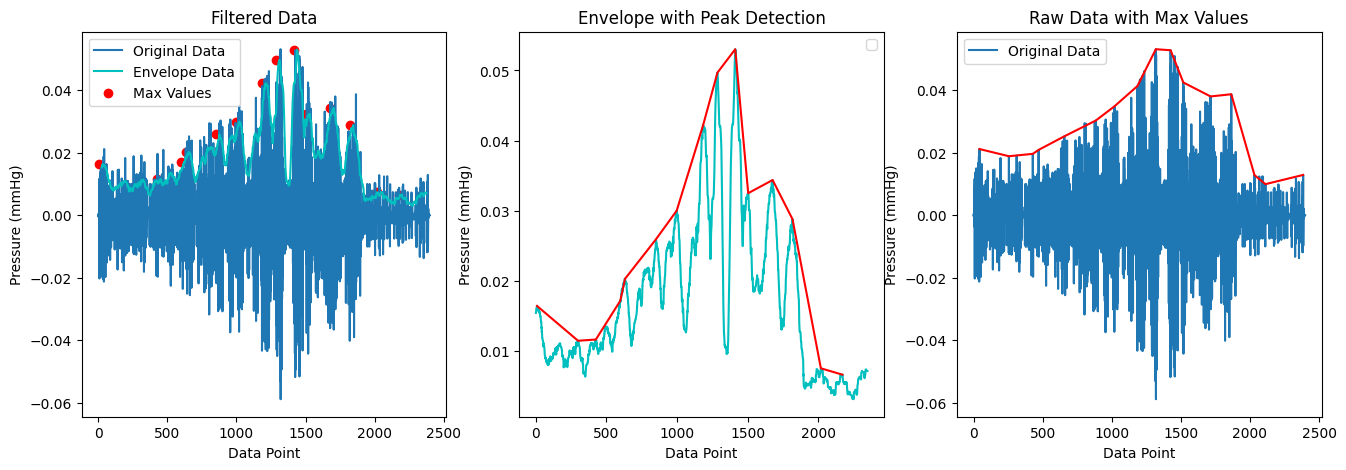

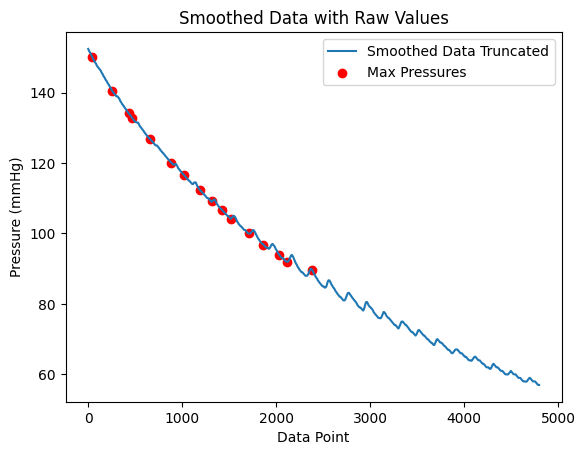

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [2]:
#attempt oscillometric data processing
# High-pass filter parameters
smoothed_data_trunc = smoothed_signal[:2400]
#smoothed_data_trunc = smoothed_signal[0:6000]
order = 4  # Filter order
cutoff_frequency = 0.2  # Cutoff frequency in Hz

# Design Butterworth high-pass filter
b, a = butter(order, cutoff_frequency, btype='high', analog=False, fs=1.0)

# Apply the filter to the data
filtered_data = filtfilt(b, a, smoothed_data_trunc)

def calculate_rms_with_overlap(data, window_size, overlap):
    step_size = window_size - overlap
    num_windows = (len(data) - window_size) // step_size + 1

    # Initialize an array to store the RMS values
    rms_values = np.zeros(num_windows)
    indices = []
    rms = []

    # Calculate RMS for each window with overlap
    for i in range(num_windows):
        window_start = i * step_size
        window_end = window_start + window_size
        window_data = data[window_start:window_end]
        rms_values[i] = np.sqrt(np.mean(window_data**2))

        rms.append(rms_values[i])
        indices.append(((window_end-window_start)/2)+i)

    return rms_values, np.array(indices), np.array(rms)

# Example usage
window_size = 50
overlap = 49  # Adjust overlap as needed

rms_values, indices, rms = calculate_rms_with_overlap(filtered_data, window_size, overlap)

print(rms)
print(indices)

envelope = rms*np.sqrt(2.0)

#Peak Detection Again
def find_max_in_blocks(data, block_size):
    num_blocks = len(data) // block_size

    # Initialize an array to store the maximum values
    max_values = np.zeros(num_blocks)
    max_indices = np.zeros(num_blocks)

    # Find the maximum value in each block
    for i in range(num_blocks):
        block_start = i * block_size
        block_end = (i + 1) * block_size
        block_data = data[block_start:block_end]
        max_values[i] = np.max(block_data)
        max_index_in_block = np.argmax(block_data)
        max_indices[i] = block_start + max_index_in_block

    return max_values, max_indices

block_size = 150 # Adjust block size as needed

max_values, max_indices = find_max_in_blocks(envelope, block_size)
max_values_raw, max_indices_raw = find_max_in_blocks(filtered_data, block_size)

max_pressures = np.zeros(len(max_values_raw))

for i in range(len(max_indices_raw)):
    current_index = int(max_indices_raw[i])
    max_pressures[i] = deflation_pressure_data[current_index] #we'll have to fix this later. The indexing for the algorithm stuff isn't what we expect. Need to clarify where the data should be truncated, what portion should be smoothed/filtered, etc.

print("Maximum Indices Raw:", max_indices_raw)
print("Max Pressures:", max_pressures)

map = np.max(max_pressures)

print("MAP:", map, "mmHg")

plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
plt.plot(filtered_data, label='Original Data')
plt.plot(indices, envelope, color='c', label = "Envelope Data")
plt.scatter(max_indices, max_values, color="r", label = "Max Values")
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Filtered Data")
plt.legend()

plt.subplot(1,3,2)
plt.plot(envelope, color="c")
plt.plot(max_indices, max_values, color="r")
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Envelope with Peak Detection")
plt.legend()

plt.subplot(1,3,3)
plt.plot(filtered_data, label='Original Data')
plt.plot(max_indices_raw, max_values_raw, color="r")
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Raw Data with Max Values")
plt.legend()

plt.show()

max_indices_round = np.zeros(len(max_indices_raw))

for i in range(len(max_indices_raw)):
    max_indices_round[i] = int(max_indices_raw[i])

#Plot initial smoothed data with max pressures
plt.figure()
plt.subplot(1,1,1)
plt.plot(deflation_pressure_data, label='Smoothed Data Truncated')
plt.scatter(max_indices_round, max_pressures, color="r", label = "Max Pressures")
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Smoothed Data with Raw Values")
plt.legend()
plt.show()

#Plot Results
plt.figure(figsize=(16,5))

# Plot the values
plt.subplot(1,3,1)
plt.plot(smoothed_signal)
plt.xlabel('Data Point')
plt.ylabel('Cuff Pressure (mmHg)')
plt.title('Cuff Pressure Curve')

plt.subplot(1,3,2)
plt.plot(filtered_data)
plt.xlabel('Data Point')
plt.ylabel('Amplitude (mmHg)')
plt.title("Oscillometric Waveform")

plt.subplot(1,3,3)
plt.plot(max_indices_raw, max_values_raw)
plt.xlabel('Data Point')
plt.ylabel('Amplitude')
plt.title("Oscillometric Waveform Envelope")
plt.legend()

plt.show()